In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv("retail_churn_data.csv")
df.head()

,Customer_ID,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score,Churn
0,CUST1000,5745.07,9,3,1.1,No
1,CUST1001,4792.60,15,3,3.4,No
2,CUST1002,5971.53,13,4,3.0,No
3,CUST1003,7284.54,1,6,1.2,Yes
4,CUST1004,4648.77,7,6,2.1,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         50 non-null     object 
 1   Monthly_Spend       50 non-null     float64
 2   Visits_Per_Month    50 non-null     int64  
 3   Discount_Usage      50 non-null     int64  
 4   Satisfaction_Score  50 non-null     float64
 5   Churn               50 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 2.5+ KB


In [7]:
df.describe()

,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score
count,50.0000,50.000000,50.000000,50.000000
mean,4661.7882,8.540000,4.580000,2.896000
std,1400.5034,5.272996,2.914356,1.147661
min,2060.4900,1.000000,0.000000,1.100000
25%,3708.5275,3.500000,2.250000,2.000000
50%,4648.7800,8.000000,5.000000,3.000000
75%,5504.4150,12.750000,7.000000,3.700000
max,7778.4200,19.000000,9.000000,4.900000


In [8]:
df.isnull().sum()

Customer_ID           0
Monthly_Spend         0
Visits_Per_Month      0
Discount_Usage        0
Satisfaction_Score    0
Churn                 0
dtype: int64

In [9]:
df[df.duplicated(subset=["Customer_ID","Monthly_Spend","Visits_Per_Month","Discount_Usage","Satisfaction_Score"]) == True]

,Customer_ID,Monthly_Spend,Visits_Per_Month,Discount_Usage,Satisfaction_Score,Churn


In [24]:

X = df.drop(["Churn", "Customer_ID"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.29,
                                                    random_state=42)


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

DTC = DecisionTreeClassifier(random_state=42)

BGC = BaggingClassifier(
    estimator=DTC,
    n_estimators=100,
    bootstrap=True,
    bootstrap_features=True
)

BGC.fit(X_train, y_train)

y_preds = BGC.predict(X_test) 

print(f"accuracy Score {accuracy_score(y_preds,y_test):.4f}")

accuracy Score 0.8667


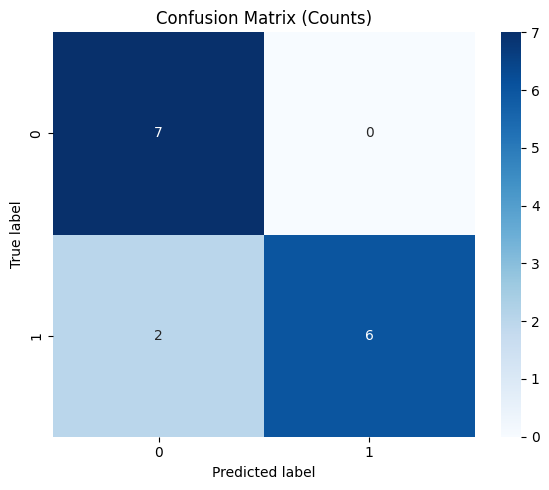

In [30]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,          # write the numbers in the boxes
    fmt="d",             # integer format for counts
    cmap="Blues",        # color map
    cbar=True
)
plt.title("Confusion Matrix (Counts)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.tight_layout()
plt.show()
